<a href="https://colab.research.google.com/github/Shreyas2121/srhreyas/blob/master/PCCE_group8_privcancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Opacus is a library that enables training PyTorch models with differential privacy. It supports training with minimal code changes required on the client, has little impact on training performance and allows the client to online track the privacy budget expended at any given moment.

In this notebook we demonstrate the use of Opacus on a **Skin Cancer Classification Model.**
This model predicts Skin Cancer: Malignant or Benign. It has an accuracy of approx. 87.69% without differential privacy and an accuracy of 75.9% with differential privacy.

In [ ]:
!pip install -U -q kaggle

In [ ]:
!mkdir -p ~/.kaggle

In [ ]:
!echo '{"username":"michellebarbosa","key":"key"}' > ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!mkdir -p data

In [ ]:
!kaggle datasets download -d fanconic/skin-cancer-malignant-vs-benign

 94% 306M/325M [00:02<00:00, 106MB/s] 
100% 325M/325M [00:03<00:00, 111MB/s]


In [ ]:
!unzip skin-cancer-malignant-vs-benign.zip

Streaming output truncated to the last 5000 lines.
  inflating: data/train/benign/421.jpg  
  inflating: data/train/benign/422.jpg  
  inflating: data/train/benign/423.jpg  
  inflating: data/train/benign/424.jpg  
  inflating: data/train/benign/425.jpg  
  inflating: data/train/benign/426.jpg  
  inflating: data/train/benign/429.jpg  
  inflating: data/train/benign/43.jpg  
  inflating: data/train/benign/430.jpg  
  inflating: data/train/benign/431.jpg  
  inflating: data/train/benign/432.jpg  
  inflating: data/train/benign/434.jpg  
  inflating: data/train/benign/435.jpg  
  inflating: data/train/benign/438.jpg  
  inflating: data/train/benign/439.jpg  
  inflating: data/train/benign/440.jpg  
  inflating: data/train/benign/441.jpg  
  inflating: data/train/benign/442.jpg  
  inflating: data/train/benign/443.jpg  
  inflating: data/train/benign/445.jpg  
  inflating: data/train/benign/446.jpg  
  inflating: data/train/benign/447.jpg  
  inflating: data/train/benign/448.jpg  
  infla

In [ ]:
!pip uninstall torch -y

Uninstalling torch-1.6.0+cu101:
  Successfully uninstalled torch-1.6.0+cu101


In [ ]:
!pip uninstall torchvision -y

Uninstalling torchvision-0.7.0+cu101:
  Successfully uninstalled torchvision-0.7.0+cu101


In [ ]:
!wget -c https://repo.anaconda.com/miniconda/Miniconda3-4.5.4-Linux-x86_64.sh
!chmod +x Miniconda3-4.5.4-Linux-x86_64.sh
!bash ./Miniconda3-4.5.4-Linux-x86_64.sh -b -f -p /usr/local
!conda install -q -y --prefix /usr/local python=3.6 ujson
import sys
sys.path.append('/usr/local/lib/python3.6/site-packages')

--2020-10-12 03:24:41--  https://repo.anaconda.com/miniconda/Miniconda3-4.5.4-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58468498 (56M) [application/x-sh]
Saving to: ‘Miniconda3-4.5.4-Linux-x86_64.sh’

Miniconda3-4.5.4-Li 100%[===================>]  55.76M   218MB/s    in 0.3s    

2020-10-12 03:24:41 (218 MB/s) - ‘Miniconda3-4.5.4-Linux-x86_64.sh’ saved [58468498/58468498]

PREFIX=/usr/local
installing: python-3.6.5-hc3d631a_2 ...
Python 3.6.5 :: Anaconda, Inc.
installing: ca-certificates-2018.03.07-0 ...
installing: conda-env-2.6.0-h36134e3_1 ...
installing: libgcc-ng-7.2.0-hdf63c60_3 ...
installing: libstdcxx-ng-7.2.0-hdf63c60_3 ...
installing: libffi-3.2.1-hd88cf55_4 ...
installing: ncurses-6.1-hf484d3e_0 ...
installing: openssl-1.0.2o-h20670df_0 ...
installing: tk-8.6

In [ ]:
import ujson
print(ujson.dumps({1:2}))

{"1":2}


In [ ]:
!conda install torchcsprng cudatoolkit=10.1 -c pytorch

Solving environment: - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.4
  latest version: 4.8.5

Please update conda by running

    $ conda update -n base conda



## Package Plan ##

  environment location: /usr/local

  added / updated specs: 
    - cudatoolkit=10.1
    - torchcsprng


The following packages will be downloaded:

    package                    |   

In [ ]:
#!git clone https://github.com/pytorch/opacus.git

In [ ]:
#import os
#os.chdir('opacus')

In [ ]:
#!pip install -e .

**Install opacus library**

In [ ]:
!pip install opacus

     |████████████████████████████████| 76 kB 2.9 MB/s 
     |████████████████████████████████| 270 kB 17.8 MB/s 
     |████████████████████████████████| 61 kB 507 kB/s 
     |████████████████████████████████| 829 kB 65.9 MB/s 
     |████████████████████████████████| 99 kB 10.7 MB/s 
     |████████████████████████████████| 48 kB 6.7 MB/s 
     |████████████████████████████████| 58 kB 7.5 MB/s 
     |████████████████████████████████| 127 kB 70.6 MB/s 
     |████████████████████████████████| 25.9 MB 35 kB/s 
     |████████████████████████████████| 14.5 MB 20 kB/s 
     |████████████████████████████████| 112 kB 73.4 MB/s 
     |████████████████████████████████| 548 kB 62.6 MB/s 
     |████████████████████████████████| 2.6 MB 58.2 MB/s 
     |████████████████████████████████| 44 kB 3.6 MB/s 
     |████████████████████████████████| 54 kB 3.5 MB/s 
     |████████████████████████████████| 69 kB 9.5 MB/s 
     |████████████████████████████████| 944 kB 60.9 MB/s 
     |█████████████████████████

In [ ]:
#!pip install torchvision==0.7.0+cu101 -f https://download.pytorch.org/whl/torch_stable.html
#!pip install torch==1.6.0+cu101 torchvision==0.7.0+cu101 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html
    100% |████████████████████████████████| 5.9MB 5.7MB/s 
kaggle 1.5.8 has requirement urllib3<1.25,>=1.21.1, but you'll have urllib3 1.25.10 which is incompatible.
  Found existing installation: torchvision 0.7.0
    Uninstalling torchvision-0.7.0:
      Successfully uninstalled torchvision-0.7.0


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.datasets as dset
from torch.utils.data.sampler import SubsetRandomSampler
import torch.nn.functional as F
import os
from torchvision import transforms
from sklearn.metrics import roc_curve, auc
import torchvision.transforms as transforms

In [ ]:
os.chdir('/content')

**On changing the max grad norm, the learning rate and the noise multiplier our accuracy went from 62% to 75.9%**

In [ ]:
BATCH_SIZE = 16
MAX_GRAD_NORM = 2
NOISE_MULTIPLIER = 1.0
DELTA = 0.0001

LR = 0.003
NUM_WORKERS = 2

In [ ]:
data_transforms = transforms.Compose([
            transforms.RandomRotation(90, resample=PIL.Image.BILINEAR),
            transforms.RandomApply((transforms.RandomHorizontalFlip(.5), 
                                    transforms.RandomVerticalFlip(.5)), p=0.5),
            transforms.ToTensor(), 
            transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
    ])

In [ ]:
trainset = dset.ImageFolder('train', 
                            transform=data_transforms)
testset = dset.ImageFolder('test', 
                           transform=data_transforms)
data_size = len(trainset.samples)
validation_split = .2
split = int(np.floor(validation_split * data_size))
indices = list(range(data_size))
np.random.shuffle(indices)
batch_size = BATCH_SIZE
train_indices, val_indices = indices[split:], indices[:split]

train_sampler = SubsetRandomSampler(train_indices)
val_sampler = SubsetRandomSampler(val_indices)

train_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, 
                                           sampler=train_sampler)
val_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                         sampler=val_sampler)

test_loader = torch.utils.data.DataLoader(testset, batch_size=batch_size)

In [ ]:
class Flattener(nn.Module):
    def forward(self, x):
        batch_size, *_ = x.shape
        return x.view(batch_size, -1)

In [ ]:
device = torch.device('cuda')
# torch.set_num_threads(16)
print(torch.cuda.get_device_name(0))
nn_model = nn.Sequential(
            nn.Conv2d(3, 64, 3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(4),
            nn.Conv2d(64, 64, 3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(24),    
            Flattener(),
            nn.Linear(64*2*2, 2),
          )
device = torch.device("cuda" if torch.cuda.is_available else "cpu")
nn_model.type(torch.cuda.FloatTensor)

# nn_model.to(device)

loss = nn.CrossEntropyLoss().type(torch.cuda.FloatTensor)

optimizer = optim.SGD(nn_model.parameters(), lr=0.003, weight_decay=1e-4)

Tesla T4


In [ ]:
#!pip uninstall torch -y

In [ ]:
#!pip uninstall torchcsprng

In [ ]:
USE_GPU = True

if USE_GPU and torch.cuda.is_available():
    print('using device: cuda')
else:
    print('using device: cpu')

using device: cuda


In [ ]:
from opacus.dp_model_inspector import DPModelInspector

inspector = DPModelInspector()
# inspector.validate(model)

In [ ]:
device

device(type='cuda')

# **Check if the model is compatible**

In [ ]:
from opacus.utils import module_modification

model = module_modification.convert_batchnorm_modules(nn_model)
model = model.to(device)
inspector = DPModelInspector()
print(f"Is the model valid? {inspector.validate(model)}")

Is the model valid? True


**To train a model with differential privacy, all you need to do is to define a PrivacyEngine and later attach it to your optimizer before running.**

In [ ]:
from opacus import PrivacyEngine
print(f"Using sigma={NOISE_MULTIPLIER} and C={MAX_GRAD_NORM}")

privacy_engine = PrivacyEngine(
    model,
    batch_size=BATCH_SIZE,
    sample_size=len(trainset),
    alphas=range(3,64),
    noise_multiplier=NOISE_MULTIPLIER,
    max_grad_norm=MAX_GRAD_NORM,
)
privacy_engine.attach(optimizer)

Using sigma=1.0 and C=2


/usr/local/lib/python3.6/site-packages/opacus/privacy_engine.py:111: UserWarning: Secure RNG turned off. This is perfectly fine for experimentation as it allows for much faster training performance, but remember to turn it on and retrain one last time before production with ``secure_rng`` turned on.
  "Secure RNG turned off. This is perfectly fine for experimentation as it allows "


In [ ]:
#def train_model(model, train_loader, val_loader, loss, optimizer, num_epochs):    
def train_model(model, train_loader, val_loader, loss, optimizer, num_epochs,delta):    
    loss_history = []
    train_history = []
    val_history = []
   

    for epoch in range(num_epochs):
        
        model.train() 
        criterion = nn.CrossEntropyLoss()
        loss_accum = 0
        correct_samples = 0
        total_samples = 0
        for i_step, (x, y) in enumerate(train_loader):
          
            x_gpu = x.to(device)
            y_gpu = y.to(device)
            prediction = model(x_gpu)    
            loss_value = criterion(prediction, y_gpu)
            optimizer.zero_grad()
            loss_value.backward()
            optimizer.step()
            
            _, indices = torch.max(prediction, 1)
            correct_samples += torch.sum(indices == y_gpu)
            total_samples += y.shape[0]
            
            loss_accum += loss_value

        ave_loss = loss_accum / i_step
        train_accuracy = float(correct_samples) / total_samples
        val_accuracy = compute_accuracy(model, val_loader)
        
        loss_history.append(float(ave_loss))
        train_history.append(train_accuracy)
        val_history.append(val_accuracy)
        epsilon, best_alpha = optimizer.privacy_engine.get_privacy_spent(DELTA)
        print(f"Average loss: {ave_loss}\t" 
              f"Train accuracy: {train_accuracy}"
              f"Val accuracy: {val_accuracy}"
              f"ε: {epsilon:.2f}, δ: {DELTA} for α = {best_alpha}")
         #print(f"Average loss: {ave_loss}, \
              #Train accuracy: {train_accuracy}, \
              #Val accuracy: {val_accuracy}")

        
    return loss_history, train_history, val_history
        
def compute_accuracy(model, loader, auc=False):
    model.eval() 
    correct_samples = 0
    total_samples = 0
    y_true, y_pred = [], []
    for (x, y) in loader:
      
        x_gpu = x.to(device)
        y_gpu = y.to(device)
        prediction = model(x_gpu)    
        indices = torch.argmax(prediction, 1)
        fpr, tpr, _ = roc_curve(y_gpu.cpu().detach().numpy(), indices.cpu().detach().numpy())

        correct_samples += torch.sum(indices == y_gpu)
        total_samples += y_gpu.shape[0]
        accuracy = float(correct_samples) / total_samples
        torch.cuda.get_device_name(0)
        if auc:
            y_true.extend(y_gpu.cpu().detach().numpy())
            y_pred.extend(indices.cpu().detach().numpy())
    if auc:
        return accuracy, y_true, y_pred
    else: 
        return accuracy
    
  
    return accuracy, y_true, y_pred

def loss_accuracy_plot(loss_history, train_history, val_history):
    plt.figure(figsize=(10, 9))
    plt.subplot(311)
#     plt.ylim(bottom=0)
    plt.title("Loss")
    plt.plot(loss_history)
    plt.subplot(312)
    plt.ylim((.5, 1))
    plt.title("Train/validation accuracy")
    plt.plot(train_history, label="train")
    plt.plot(val_history, label="validation")

    plt.legend();

/usr/local/lib/python3.6/site-packages/opacus/privacy_engine.py:271: UserWarning: PrivacyEngine expected a batch of size 16 but the last step received a batch of size 14. This means that the privacy analysis will be a bit more pessimistic. You can set `drop_last = True` in your PyTorch dataloader to avoid this problem completely
  f"PrivacyEngine expected a batch of size {self.batch_size} "


Average loss: 1.0583631992340088	Train accuracy: 0.5497630331753555Val accuracy: 0.540796963946869ε: 1.49, δ: 0.0001 for α = 9
Average loss: 0.9809806942939758	Train accuracy: 0.5502369668246445Val accuracy: 0.5351043643263758ε: 1.53, δ: 0.0001 for α = 9
Average loss: 0.8869476318359375	Train accuracy: 0.5502369668246445Val accuracy: 0.5426944971537002ε: 1.58, δ: 0.0001 for α = 9
Average loss: 0.7739042639732361	Train accuracy: 0.5753554502369668Val accuracy: 0.5787476280834914ε: 1.62, δ: 0.0001 for α = 9
Average loss: 0.7119336128234863	Train accuracy: 0.6104265402843602Val accuracy: 0.6337760910815939ε: 1.66, δ: 0.0001 for α = 9
Average loss: 0.6608406901359558	Train accuracy: 0.6388625592417062Val accuracy: 0.683111954459203ε: 1.71, δ: 0.0001 for α = 9
Average loss: 0.5806654095649719	Train accuracy: 0.6909952606635071Val accuracy: 0.7229601518026565ε: 1.75, δ: 0.0001 for α = 9
Average loss: 0.5473610162734985	Train accuracy: 0.7146919431279621Val accuracy: 0.7096774193548387ε: 1.80

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_ranking.py:800: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)


Final accuracy on the test set is: 0.753030303030303; auc is: 0.7591666666666667


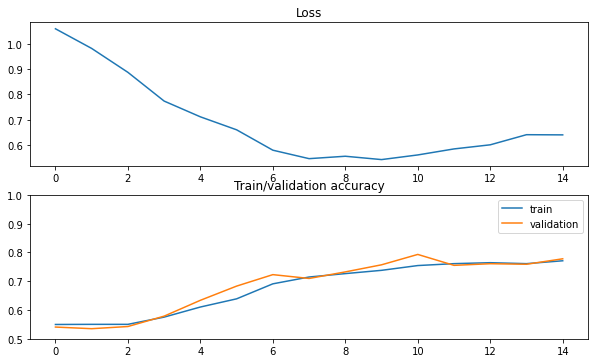

In [ ]:
loss_history, train_history, val_history = train_model(nn_model, 
                                                       train_loader, 
                                                       val_loader, 
                                                       loss, 
                                                       optimizer,15,delta=DELTA)
#loss_history, train_history, val_history = train_model(nn_model, train_loader, val_loader, loss, optimizer,30,delta=DELTA)

loss_accuracy_plot(loss_history, train_history, val_history)
print('Finished!')

test_accuracy, y_true, y_pred = compute_accuracy(nn_model, test_loader, auc=True)

fpr, tpr, _ = roc_curve(y_true, y_pred)
auc_rate = auc(fpr, tpr)


print(f'Final accuracy on the test set is: {test_accuracy}; auc is: {auc_rate}')